In [6]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import seaborn as sns
sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

INITIAL - RENT DATA

In [7]:
rent_df = pd.read_csv('../data/iProperty_rent_to_be_trained.csv')

rent_df.drop(['name','psf','area'], axis=1, inplace=True)

for col in ['price']:
    q_low = rent_df[col].quantile(0.01)
    q_hi  = rent_df[col].quantile(0.99)
    rent_df = rent_df[(rent_df[col] < q_hi) & (rent_df[col] > q_low)]
    
one_hot = pd.get_dummies(rent_df[['district','state','type','details']])
rent_df = rent_df.join(one_hot).drop(['district','state','type','details'], axis=1)

for num in rent_df.drop(['price'], axis=1).dtypes[(rent_df.dtypes == "int64")].index:
    MMS = MinMaxScaler()
    MMS.fit(rent_df[[num]])
    rent_df[num] = MMS.transform(rent_df[[num]])
    
rent_x = rent_df.drop(['price'],axis=1)
rent_y = rent_df['price']

rent_x_train, rent_x_test, rent_y_train, rent_y_test = train_test_split(rent_x,rent_y,test_size=0.2)

MODEL & HYPERPARAMETERS

In [8]:
SEED=42
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=SEED),
    'Random Forest': RandomForestRegressor(random_state=SEED),
    'Support Vector Machine': SVR(),
    'Gradient Boost': GradientBoostingRegressor(random_state=SEED),
    'Neural Network': MLPRegressor(random_state=SEED),
    'XG Boost': XGBRegressor(seed=SEED),
}

In [9]:
dt_hyperparameters = {}

rf_hyperparameters = {
    'n_estimators' : 100
}

sv_hyperparameters = {}

gb_hyperparameters = {
    'n_estimators' : 100,
    'learning_rate' : 0.1,
    'max_depth' : 3,
}

nn_hyperparameters = {'hidden_layer_sizes' : (80,40,20,10)}

xg_hyperparameters = {}

hyperparameters = {
    'Decision Tree': dt_hyperparameters,
    'Random Forest': rf_hyperparameters,
    'Support Vector Machine': sv_hyperparameters,
    'Gradient Boost': gb_hyperparameters,
    'Neural Network': nn_hyperparameters,
    'XG Boost'      : xg_hyperparameters
}

METRICS

In [11]:
score = {
    'score':['R2','RMSE','MAE','MAPE']
}

In [12]:
for key, value in models.items():
    model = value
    model.set_params(**hyperparameters[key])
    model.fit(rent_x_train,rent_y_train)
    rent_y_pred = model.predict(rent_x_test)
    
    score[key] = []
    score[key].append(r2_score(rent_y_test,rent_y_pred))
    score[key].append(mean_squared_error(rent_y_test,rent_y_pred, squared=False))
    score[key].append(mean_absolute_error(rent_y_test,rent_y_pred))
    score[key].append(mean_absolute_percentage_error(rent_y_test,rent_y_pred))
    print(key + ': Score is ready')

Decision Tree: Score is ready
Random Forest: Score is ready
Support Vector Machine: Score is ready
Gradient Boost: Score is ready


C:\Users\DS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network: Score is ready
XG Boost: Score is ready


In [13]:
score_df = pd.DataFrame(score).T
score_df.columns = score_df.iloc[0]
score_df = score_df[1:]
score_df = score_df.reset_index()
score_df.rename(columns={'index':'model'}, inplace=True)
score_df

score,model,R2,RMSE,MAE,MAPE
0,Decision Tree,0.66369,1154.324352,637.897396,0.251637
1,Random Forest,0.759783,975.572771,586.720398,0.236845
2,Support Vector Machine,-0.049301,2038.956646,1124.43292,0.391935
3,Gradient Boost,0.720646,1052.048426,689.345462,0.299479
4,Neural Network,0.723662,1046.353479,628.209983,0.248968
5,XG Boost,0.763966,967.041959,593.998428,0.244227


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Support Vector Machine'),
  Text(3, 0, 'Gradient Boost'),
  Text(4, 0, 'Neural Network'),
  Text(5, 0, 'XG Boost')])

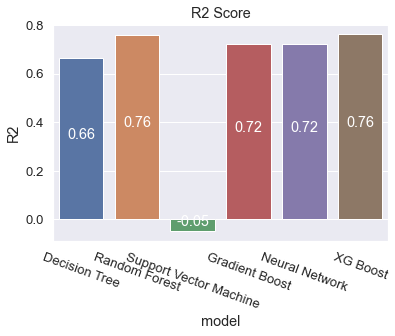

In [14]:
p = sns.barplot(data=score_df, x='model', y='R2')
p.set_title('R2 Score')
for i in range(len(score_df)):
    p.text(i,score_df.R2[i]/2,str(round(score_df.R2[i],2)),
           fontdict=dict(color='white'),
          horizontalalignment='center')
plt.xticks(rotation=-20)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Support Vector Machine'),
  Text(3, 0, 'Gradient Boost'),
  Text(4, 0, 'Neural Network'),
  Text(5, 0, 'XG Boost')])

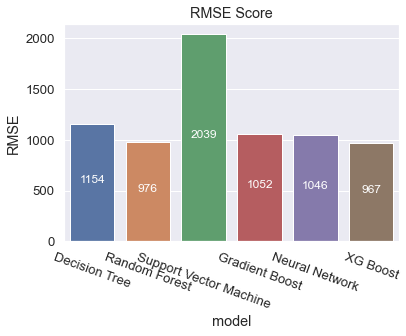

In [15]:
p = sns.barplot(data=score_df, x='model', y='RMSE')
p.set_title('RMSE Score')
for i in range(len(score_df)):
    p.text(i,score_df.RMSE[i]/2,str(round(score_df.RMSE[i])),
           fontdict=dict(color='white', fontsize=12),
          horizontalalignment='center')
plt.xticks(rotation=-20)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Support Vector Machine'),
  Text(3, 0, 'Gradient Boost'),
  Text(4, 0, 'Neural Network'),
  Text(5, 0, 'XG Boost')])

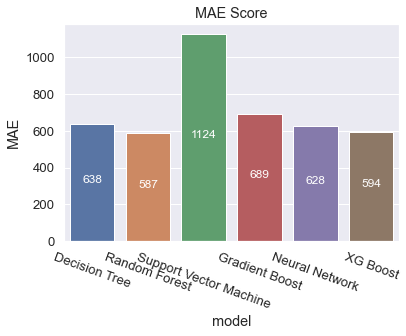

In [16]:
p = sns.barplot(data=score_df, x='model', y='MAE')
p.set_title('MAE Score')
for i in range(len(score_df)):
    p.text(i,score_df.MAE[i]/2,str(round(score_df.MAE[i])),
           fontdict=dict(color='white', fontsize=12),
          horizontalalignment='center')
plt.xticks(rotation=-20)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Support Vector Machine'),
  Text(3, 0, 'Gradient Boost'),
  Text(4, 0, 'Neural Network'),
  Text(5, 0, 'XG Boost')])

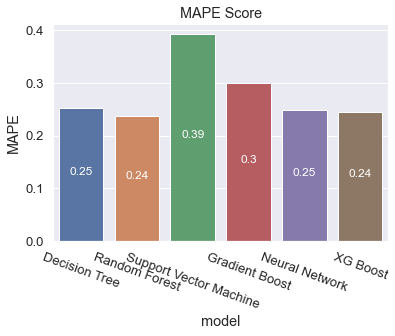

In [17]:
p = sns.barplot(data=score_df, x='model', y='MAPE')
p.set_title('MAPE Score')
for i in range(len(score_df)):
    p.text(i,score_df.MAPE[i]/2,str(round(score_df.MAPE[i],2)),
           fontdict=dict(color='white', fontsize=12),
          horizontalalignment='center')
plt.xticks(rotation=-20)